* 归一化 ：量纲处理 preprocessing.scale()，无关分布

* 分布偏斜的处理：将偏态分布转换为正态分布

* 变量相关系数：
      * 两变量间（线性）相关关系的度量： 皮尔逊（积矩）相关系数
      * scatter_matrix
 **这里讨论的相关性，限于两个单独的变量；而后面 假设检验 所讨论的“相关性”，基于样本与总体、样本与样本，限于（样本/总体）均值、比例。**
 
* 缺失值插补 : sklearn.preprocessing.Imputer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import mtcars
%matplotlib inline

## Centering and Scaling 

不同的数值变量有不同的量纲，很难比较。因此需要中心化和统一量纲。最常用的方法是zero-centering：
![z-value](z.png)

In [2]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.index=mtcars.name  # 设置索引名
del mtcars['name']

In [6]:
colmeans= mtcars.sum()/mtcars.shape[0]  # 数值列和/观测数（行数），得到每个变量（列）的平均
colmeans         

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [19]:
centered = mtcars-colmeans # 离差。 pd.DataFrame 可以进行element-wise 的数学运算
#centered

负数表示 < 均值，正数表示 > 均值

中心化之后，因为各变量的单位不同，100厘米和1米在数值计算上会有不一样的影响，因此需要统一量纲：

In [18]:
column_deviation= mtcars.std()
z_value = centered/column_deviation
#z_value

至此，每个数值变量都有用样的中心：均值0，围绕1分布的一致的标准差1

也可以用sklearn操作：

In [20]:
from sklearn import preprocessing

In [23]:
scaled_data = preprocessing.scale(mtcars) # 返回的是ndarray，因此需要再转换成DataFrame
scaled_cars = pd.DataFrame(scaled_data,    
                           index = mtcars.index,
                           columns = mtcars.columns)
scaled_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
Mazda RX4 Wag,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
Datsun 710,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
Hornet 4 Drive,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
Hornet Sportabout,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


## Dealing With Skewed Data
The distribution of data--its overall shape and how it is spread out.

Data that is roughly evenly spread around the mean value--known as normally distributed data--tends to be well-behaved. 

On the other hand, some data sets exhibit significant skewness or asymmetry:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117e5fdd8>]], dtype=object)

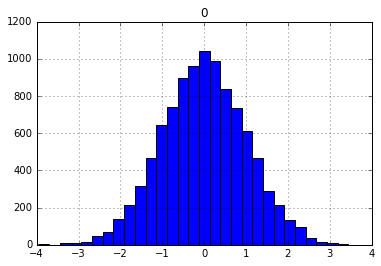

In [26]:
# normally distributed data
normal = np.random.normal(size=10000)
normal = pd.DataFrame(normal)
normal.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f15160>]], dtype=object)

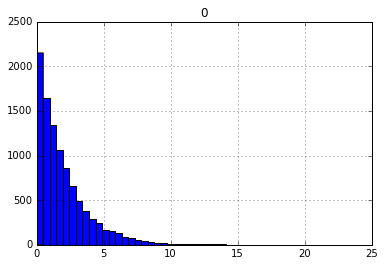

In [32]:
# skewed data 
skewed = np.random.exponential(scale=2,     #均值为2
                               size=10000)
skewed = pd.DataFrame(skewed)

skewed.hist(bins=50)
#np.random.expoential?

In [33]:
#当右边有一个长尾，称该分布为 正偏或右偏
skewed.skew()

0    2.216742
dtype: float64

当数据偏斜，意味着在长尾上存在极端值，会显著影响检验和建模。
降低偏度的方法有：
1. 对每个数据点开根√
2. 对每个数据的取自然对数㏒

√ 和 ㏒ 方法都要求数据中不能有负数，通常处理含负数数据的做法是：加一个常数使 ≥ 1

偏度为： 0    0.669628
dtype: float64


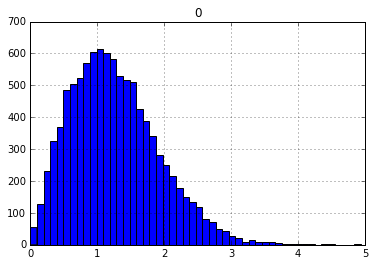

In [48]:
sqtr_transform = skewed.apply(np.sqrt) 
                               #df.apply() function applies a given function to each row or column of the DataFrame.
sqtr_transform.hist(bins=50)

print("偏度为：",sqtr_transform.skew())

偏度为： 0    0.444292
dtype: float64


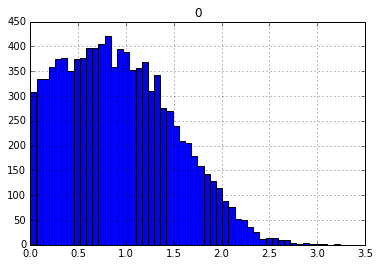

In [50]:
log_transform = (skewed+1).apply(np.log) # 确保没有负数。
log_transform.hist(bins=50)               

print('偏度为：',log_transform.skew())

## Highly Correlated Variables

在预测模型中，最理想的情况是：用于建模的每个变量只反映数据的唯一特征。换句话说，我们希望每个变量不相关，告诉你不同的信息。

但实际上，多个变量常常存在共线性(collinearity)——一种高相关或趋同，这会彼此干扰，影响模型表现，扰乱预测结果。

check the 【pairwise correlations】 between 【numeric variables】 using the df.corr() function:![correlation](correlation.png)

![协方差](pearson.png)

**这里讨论的相关性，限于两个单独的变量；而后面假设检验所讨论的“相关性”，基于样本与总体、样本与样本，限于（样本/总体）均值、比例。**

In [54]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [55]:
mtcars.ix[:,0:6].corr()  # Check the pairwise correlations of 6 variables

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000


#### A scatter plot matrix：

In [57]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11edef828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f656f60>]], dtype=object)

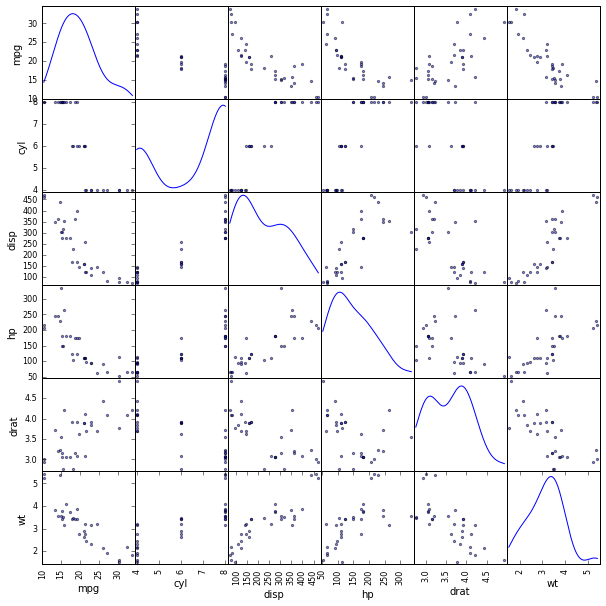

In [58]:
scatter_matrix(mtcars.ix[:,0:6],
               figsize=(10,10),
               diagonal='kde')            # Show distribution estimates on diagonal

散点图矩阵可以直观地看出两两变量间的相关性。也可以帮助发现数据中的异常，比如上图中的变量cyl。

如果发现了高（线性）相关的变量，处理方法包括：
1. 放着不动
2. 删除1个或多个
3. 以某种方式进行组合

常常考虑的是 减少 变量数量：删除或组合它们的方式即为“降维“。至于到底怎么处理，根据问题目标而定。

### 缺失值插补Imputing with Sklearn

In [62]:
# 设几个缺失值：
mtcars["mpg"] = np.where(mtcars["mpg"]>22, None, mtcars["mpg"])

mtcars["mpg"].isnull().sum()       

9

In [60]:
# 用均值填充缺失值
from sklearn.preprocessing import Imputer

In [67]:
imp = Imputer(missing_value='NaN',
              strategy = 'mean',    # 用mean填充
              axis=0)  
imputed_cars = imp.fit_transform(mtcars) # 返回的是ndarray
imputed_cars = pd.DataFrame(imputed_cars,
                            index = mtcars.index,
                            columns = mtcars.columns)
imputed_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.000000,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.000000,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,17.065217,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.400000,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.700000,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


目前Imputer仅支持填充 mean,median,mode，默认strategy='mean'.

其他插补方法还有 k近邻插补（根据相似度或相近度）、回归模型等。